In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df = pd.read_csv('../fifa_dataset2.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [8]:
columns_feature_selection = ['Age','Nationality','Overall','Value','Wage','Preferred Foot','Body Type','Jersey Number',
'Joined','Contract Valid Until','Height','Finishing','ShortPassing','Volleys','Curve','LongPassing','Acceleration',
'Reactions','Balance','Strength','LongShots','Interceptions','Positioning','Vision','Composure','StandingTackle',
'GKHandling','GKKicking','GKPositioning','GKReflexes','Release Clause']

In [9]:
df1 = df[columns_feature_selection]

In [11]:
X = df1[df1.columns[1:]]
y = df1['Release Clause']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [15]:
print(regr.score(X_test, y_test))

1.0


In [16]:
y_pred = regr.predict(X_test)

In [24]:
X_test.index

Int64Index([ 7685, 13398, 15298, 15099, 10081, 14757,    62, 14041,  6111,
             3497,
            ...
            12816, 10282,  4445,  6455, 12634, 16505,  3924, 10186, 16264,
             2406],
           dtype='int64', length=4161)

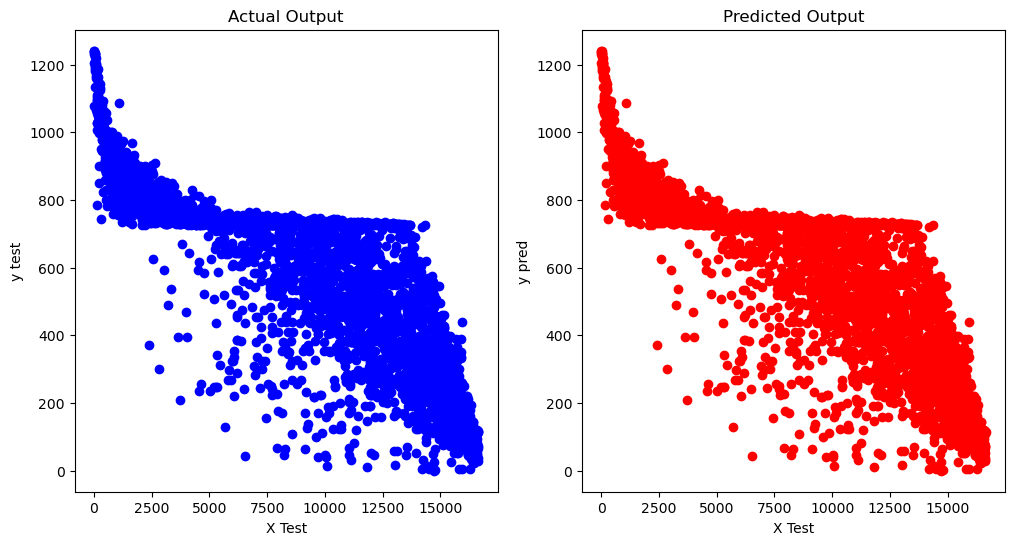

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(X_test.index, y_test, color ='b')
plt.title('Actual Output')
plt.xlabel('X Test')
plt.ylabel('y test')
plt.subplot(1, 2, 2)
plt.scatter(X_test.index, y_pred, color ='red')
plt.title('Predicted Output')
plt.xlabel('X Test')
plt.ylabel('y pred')
plt.savefig("Actual Output vs Predicted Output.pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

In [49]:
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False) 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.556204814993035e-13
MSE: 3.712837713697909e-26
RMSE: 1.9268725213926086e-13
